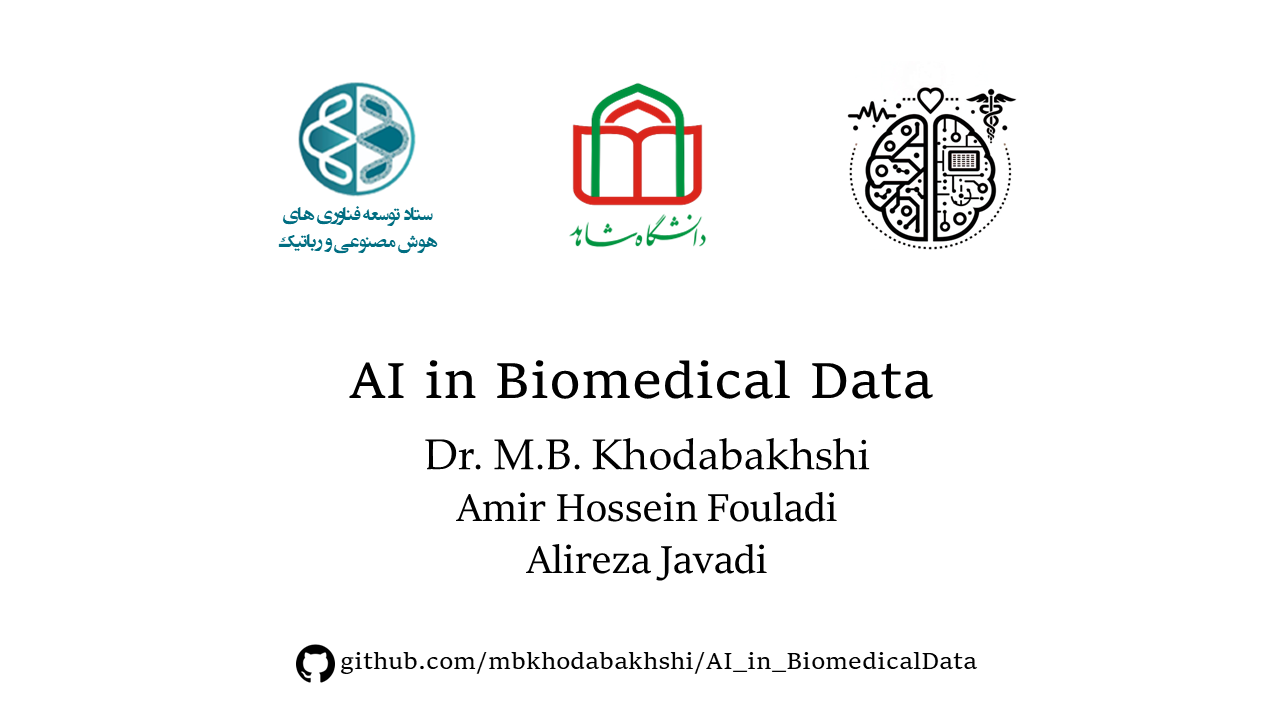

https://github.com/mbkhodabakhshi/AI_in_BiomedicalData

----------------------------------------------------

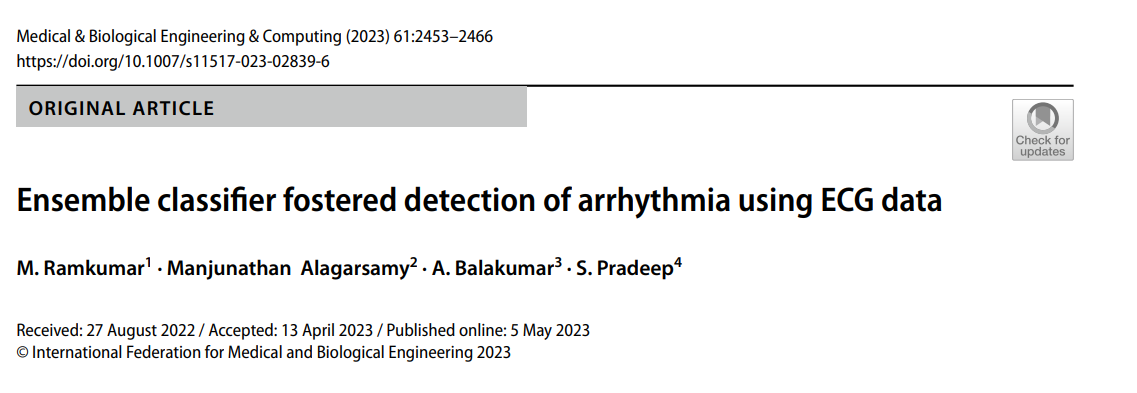

https://doi.org/10.1007/s11517-023-02839-6

-----------------------------------

# Dataset

https://archive.physionet.org/cgi-bin/atm/ATM

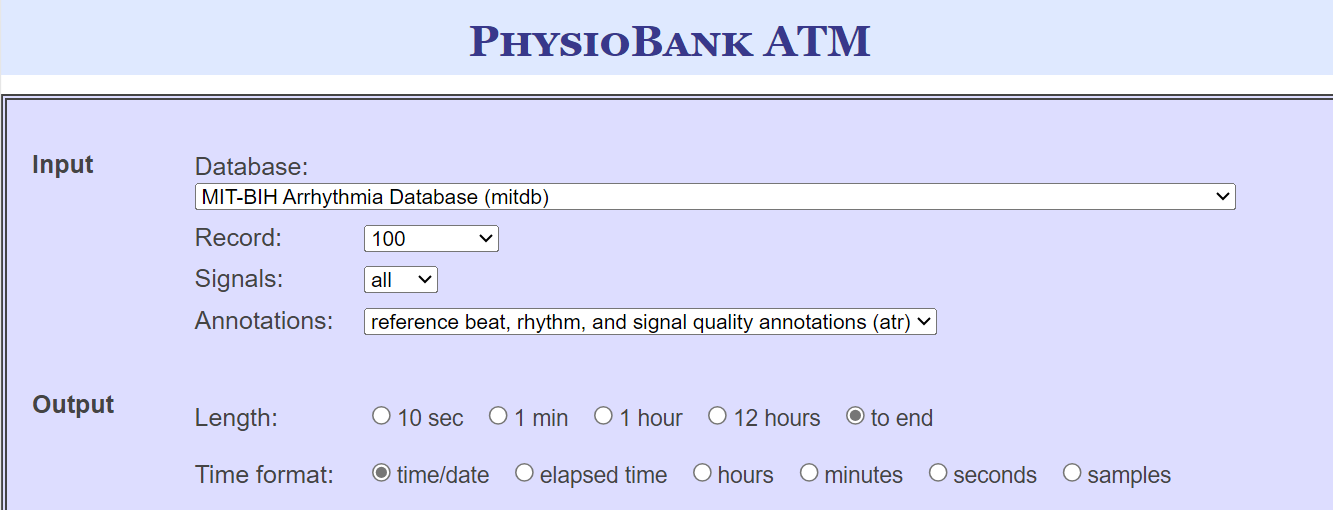

https://physionet.org/content/mitdb/1.0.0/

# Preprocessing 

https://github.com/hsd1503/PhysioNet

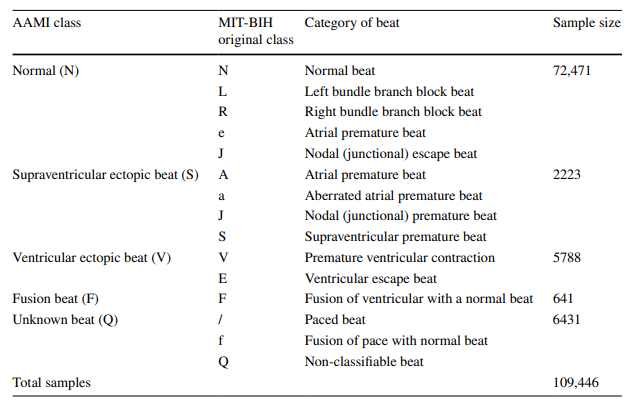

In [1]:
label_group_map = {'N':'N', 'L':'N', 'R':'N', 
                   'V':'V', 'E':'V',
                   'A':'S', 'j':'S', 'a':'S', 'J':'S', 'e':'S', 'S':'S',
                   '/':'Q', 'f':'Q', 'Q':'Q',
                   'F':'F'}

In [2]:
import numpy as np

def resample_interpolation(ts, fs_in, fs_out):
    if fs_out == fs_in:
        return ts
    else:
        x_old= np.linspace(0, 1, num= len(ts), endpoint= True)
        x_new= np.linspace(0, 1, num= fs_out, endpoint= True)
        return np.interp(x_new, x_old, ts)

In [5]:
import os

def read_records(path):
    with open(os.path.join(path, 'RECORDS'), 'r') as fin:
        all_record_name = fin.read().split('\n')
    return all_record_name

read_records('./mit-bih-arrhythmia-database-1.0.0')

['100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '121',
 '122',
 '123',
 '124',
 '200',
 '201',
 '202',
 '203',
 '205',
 '207',
 '208',
 '209',
 '210',
 '212',
 '213',
 '214',
 '215',
 '217',
 '219',
 '220',
 '221',
 '222',
 '223',
 '228',
 '230',
 '231',
 '232',
 '233',
 '234',
 '']

https://wfdb.readthedocs.io/en/latest/

In [10]:
import wfdb

sample_record= os.path.join('./mit-bih-arrhythmia-database-1.0.0', '100')
sample_annotation= wfdb.rdann(sample_record, 'atr').__dict__
sample_data= wfdb.rdsamp(sample_record)

# print(len(sample_annotation))
# print(sample_annotation)
# print(sample_annotation['record_name'])
# print(sample_annotation['symbol'])

# print(len(sample_data))
# print(sample_data)
# print(sample_data[0])
# print(sample_data[1]['sig_len'])
# print(sample_data[1]['fs'])
# print(sample_data[1]['sig_name'])

650000
360
['MLII', 'V5']


In [12]:
sample_fs= sample_data[1]['fs']
sample_leads= sample_data[1]['sig_name']

selected_lead_index= sample_leads.index('MLII')
print(selected_lead_index)
# selected_lead_index= sample_leads.index('V5')
# print(selected_lead_index)

sample_lead_data= sample_data[0][:, selected_lead_index]

print(len(sample_annotation['symbol']))
print(len(sample_annotation['sample']))
print(sample_annotation['sample'])
print(sample_annotation['symbol'])

sample_index_list= list(sample_annotation['sample'])
sample_label_list= sample_annotation['symbol']

0
2274
2274
[    18     77    370 ... 649484 649734 649991]
['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [13]:
sample_data= []
sample_labels= []

for i in range(len(sample_label_list)):
    sample_mark= sample_label_list[i]
    if sample_mark in label_group_map.keys():
        idx_start= sample_index_list[i]- int(sample_fs/ 2)
        idx_end= sample_index_list[i]+ int(sample_fs/ 2)
        if 0 <= idx_start< len(sample_lead_data) and idx_end <= len(sample_lead_data):
            sample_segment= sample_lead_data[idx_start: idx_end]
            sample_segment_resampled= resample_interpolation(sample_segment, 
                                                             sample_fs, fs_out= 360)
            sample_data.append(sample_segment_resampled)
            sample_labels.append(label_group_map[sample_mark])
            
print('data size: ',len(sample_data), '*', len(sample_data[0]))
print('label size: ',len(sample_labels))

data size:  2271 * 360
label size:  2271


In [14]:
from sklearn.preprocessing import LabelEncoder

sample_label_encoder= LabelEncoder()
sample_labels_encoded= sample_label_encoder.fit_transform(sample_labels)
print(set(sample_labels_encoded))

{0, 1, 2}


------------------------------------------------------------------

In [15]:
def load_and_preprocess_data(path, valid_lead=['MLII'], fs_out=360):
    all_data= []
    all_labels= []
    
    with open(os.path.join(path, 'RECORDS'), 'r') as fin:
        all_record_name= fin.read().strip().split('\n')

    for record_name in all_record_name:
        try:
            tmp_ann_res= wfdb.rdann(os.path.join(path, record_name), 'atr').__dict__
            tmp_data_res= wfdb.rdsamp(os.path.join(path, record_name))
        except:
            print(f'Error reading {record_name}')
            continue

        fs= tmp_data_res[1]['fs']
        lead_in_data= tmp_data_res[1]['sig_name']

        if valid_lead[0] in lead_in_data:
            channel= lead_in_data.index(valid_lead[0])
            tmp_data= tmp_data_res[0][:, channel]

            idx_list= list(tmp_ann_res['sample'])
            label_list= tmp_ann_res['symbol']

            for i in range(len(label_list)):
                s = label_list[i]
                if s in label_group_map.keys():
                    idx_start = idx_list[i] - int(fs/ 2)
                    idx_end = idx_list[i] + int(fs/ 2)
                    if 0 <= idx_start < len(tmp_data) and idx_end <= len(tmp_data):
                        segment = tmp_data[idx_start:idx_end]
                        segment_resampled = resample_interpolation(segment, fs, fs_out)
                        all_data.append(segment_resampled)
                        all_labels.append(label_group_map[s])

        print(f'Processed {record_name}, total segments: {len(all_data)}')

    label_encoder= LabelEncoder()
    all_labels_encoded= label_encoder.fit_transform(all_labels)

    return np.array(all_data), all_labels_encoded


path= './mit-bih-arrhythmia-database-1.0.0'
all_data, all_labels= load_and_preprocess_data(path)
print()
print(f'Preprocessed data shape: {all_data.shape}')
print(f'Preprocessed labels shape: {all_labels.shape}')

Processed 100, total segments: 2271
Processed 101, total segments: 4135
Processed 102, total segments: 4135
Processed 103, total segments: 6218
Processed 104, total segments: 6218
Processed 105, total segments: 8790
Processed 106, total segments: 10817
Processed 107, total segments: 12953
Processed 108, total segments: 14715
Processed 109, total segments: 17245
Processed 111, total segments: 19369
Processed 112, total segments: 21906
Processed 113, total segments: 23699
Processed 114, total segments: 25578
Processed 115, total segments: 27529
Processed 116, total segments: 29940
Processed 117, total segments: 31474
Processed 118, total segments: 33751
Processed 119, total segments: 35738
Processed 121, total segments: 37599
Processed 122, total segments: 40073
Processed 123, total segments: 41590
Processed 124, total segments: 43208
Processed 200, total segments: 45808
Processed 201, total segments: 47770
Processed 202, total segments: 49905
Processed 203, total segments: 52884
Process

------------------------------------

# Feature extraction

**3.3.1 Statistical features:**

• Power spectrum of the signal

• **Mean absolute value of the signal**

• **Standard deviation**

• Skewness of the signal

• Kurtosis of the signal

• Mean ratio

• **Peak positive value**

• **Peak negative value**

• Second peak negative value

In [16]:
def extract_features(records):
    features= []
    for record in records:
        mean_val= np.mean(record)
        std_val= np.std(record)
        max_val= np.max(record)
        min_val= np.min(record)
        features.append([mean_val, std_val, max_val, min_val])
    return np.array(features)

features= extract_features(all_data)

print(f'Extracted features shape: {features.shape}')
print(features[:5])

Extracted features shape: (105026, 4)
[[-0.30979167  0.16913103  0.94       -0.535     ]
 [-0.33238889  0.15355008  0.96       -0.57      ]
 [-0.33295833  0.14579737  0.86       -0.645     ]
 [-0.33195833  0.13820973  0.82       -0.565     ]
 [-0.32575     0.14692399  0.885      -0.545     ]]


-------------------------------------------------------

# Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, all_labels, 
                                                    test_size= 0.2, random_state= 42)

print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}')

Training data shape: (84020, 4), Training labels shape: (84020,)
Test data shape: (21006, 4), Test labels shape: (21006,)


-----------------------------------------------------

# Training

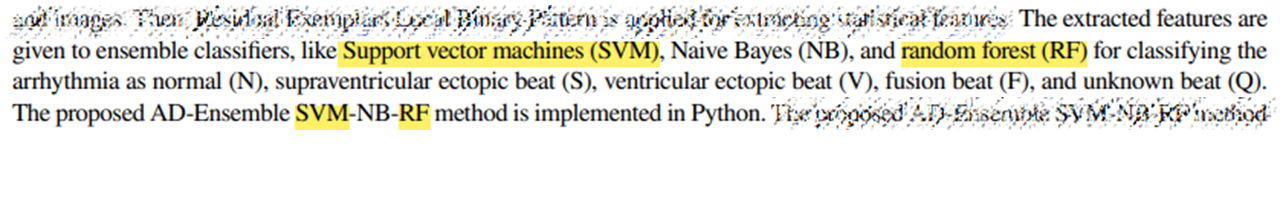

In [18]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def train_ensemble_voting(X_train, y_train):
    
    svm_model= SVC(probability= True, random_state= 44)
    rf_model= RandomForestClassifier(random_state= 44)

    ensemble_model = VotingClassifier(estimators=[
        ('svm', svm_model),
        ('rf', rf_model) ], voting= 'soft') 

    ensemble_model.fit(X_train, y_train)
    return ensemble_model

ensemble_model= train_ensemble_voting(X_train, y_train)

print('Ensemble model trained successfully')

Ensemble model trained successfully


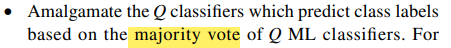

------------------------------------

# Evaluation

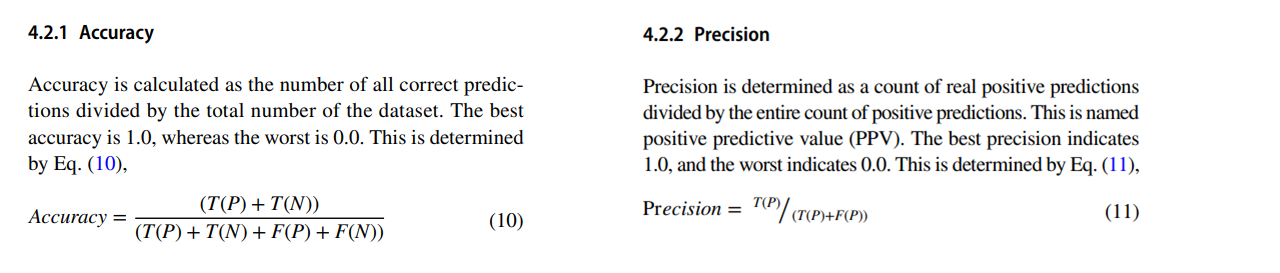

In [19]:
from sklearn.metrics import accuracy_score, precision_score

y_pred= ensemble_model.predict(X_test)

def evaluate_model(y_test, y_pred):
    accuracy= accuracy_score(y_test, y_pred)
    precision= precision_score(y_test, y_pred, average= 'macro')

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')

evaluate_model(y_test, y_pred)

Accuracy: 0.93
Precision: 0.85
